# Dense Neural Networks

## Mutual Information

### **Mutual Information (MI) for Feature Selection**  
**Mutual Information** measures the **statistical dependence** between two variables, capturing **both linear and nonlinear relationships**. Unlike Pearson correlation (which only detects linear trends), MI quantifies how much knowing one variable reduces uncertainty about the other.  

#### **Mathematical Definition**  
For two continuous variables \( X \) and \( Y \):  

$\text{MI}(X, Y) = \iint p(x, y) \log \left( \frac{p(x, y)}{p(x)p(y)} \right) dx \, dy$  
where:  
- $( p(x, y) )$ = joint probability density.  
- $( p(x), p(y) )$ = marginal densities.  

**Key Properties**:  
- $MI (\geq 0)$ (0 means independent).  
- Higher MI = stronger dependency.  


## Used libraries

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
colab = False

In [3]:
if colab: 
    import sys
    sys.path.append('/content/drive/MyDrive/Colaboracion_Quimica/Main_Codes/AutoEncoders/AmaroX/AmaroX')
    ! pip install python-telegram-bot

    from ai_functions import *
    from ai_models import *
    from utilities import *
    from data_manipulation import *
    import pandas as pd
else: 
    from AmaroX.AmaroX.ai_functions import *
    from AmaroX.AmaroX.ai_models import *
    from AmaroX.AmaroX.utilities import *
    from AmaroX.AmaroX.data_manipulation import *
    import pandas as pd
    import sklearn
    import seaborn as sns

2025-08-21 17:21:19.007703: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-21 17:21:20.456766: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/alan-amaro/miniconda3/envs/farma/lib/python3.9/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


## Data

The data presented here corresponds to molecules with their SMILE representation and descriptors, along with the biological activity. Let's first do a quick view of the data shape.

* All the data presented here was obtained by colaboration with Dr. Erick Padilla at Facultad de Estudios Superiores Zaragoza - UNAM.

### Downloading the data

In [4]:
if colab:
    ! gdown --id 1cHM9neEhTOZ82UU9HaZkdGdlwE1d4SJT
    ! gdown --id 1wZp9pou63ElEYyGGjBeC2pDtscgRgCpj

The _data.xlsx_ file contains all the molecular descriptors from the molecule, along with a SMILE representation.

In [5]:
compounds_md = pd.read_csv("/media/alan-amaro/XicoDisk/Data_Farma_FESZ/Alzheimer/Data/AZH_descriptors_1.csv", low_memory = False)

In [6]:
compounds_md.head(15)

,QED,MolWt,LogP,HAC,RB,TPSA,HBA,HDB,Activity,SMILES,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,0.197668,578.805,6.51442,43,11,73.39,6,2,1,Cc1c(N2CCN(C)CC2)nc2ccccc2c1C(=O)NCCCCCCCNc1c2...,...,10.752719,80.685788,578.373310,6.498577,8198,73,228.0,271.0,11.194444,9.527778
1,0.385319,358.442,3.10360,26,10,89.32,6,2,1,O=[N+]([O-])OCCCNCCCNc1c2c(nc3ccccc13)CCCC2,...,10.024687,60.503050,358.200491,6.888471,2030,37,128.0,146.0,7.166667,5.944444
2,0.653235,310.485,5.80432,23,7,24.92,2,1,1,CCCCCCCNc1c2c(nc3cc(C)ccc13)CCCC2,...,10.023091,57.201662,310.240899,5.853602,1270,35,116.0,135.0,6.416667,5.277778
3,0.038102,638.884,7.00050,48,14,104.90,6,5,1,Nc1ccc2c(c1)c(-c1ccccc1)[n+](CCCNCCCNCCCNc1c3c...,...,10.891894,86.295898,638.396571,6.649964,11190,82,256.0,305.0,11.555556,10.638889
4,0.154825,595.618,10.01430,42,10,49.84,4,2,1,Clc1ccc2c(NCCCCCCCNc3c4c(nc5cc(Cl)ccc35)-c3ccc...,...,10.824308,94.181450,594.231703,7.618355,7479,73,232.0,280.0,10.055556,9.111111
5,0.225750,468.645,6.31620,35,11,69.81,3,3,1,O=C(CCc1c[nH]c2ccccc12)NCCCCCCNc1c2c(nc3ccccc1...,...,10.416581,85.301759,468.288912,6.595618,4995,53,182.0,213.0,8.250000,7.833333
6,0.227092,497.687,5.46780,37,12,73.05,4,3,1,CN(CCCNC(=O)CCc1c[nH]c2ccccc12)CCCNc1c2c(nc3cc...,...,10.457459,87.547641,497.315461,6.543624,5811,56,192.0,224.0,9.361111,8.250000
7,0.228277,503.090,7.05110,36,10,58.95,4,2,1,Cn1cc(C(=O)NCCCCCCCNc2c3c(nc4cc(Cl)ccc24)CCCC3...,...,10.529185,86.975712,502.249939,7.073943,5222,58,190.0,225.0,9.722222,7.972222
8,0.094773,631.817,9.68800,47,14,72.90,7,1,0,COc1cccc2cc(CN(CCCCCCNc3c4c(nc5ccccc35)CCCCC4)...,...,10.774300,101.181175,631.341007,6.862402,9700,79,252.0,300.0,11.305556,10.472222
9,0.138447,602.779,7.27780,45,13,85.25,6,2,1,COc1ccc(Cn2cc(C(=O)NCCCCCCCNc3c4c(nc5ccccc35)C...,...,10.753019,82.795526,602.325691,6.923284,9506,75,236.0,279.0,11.694444,10.083333


In [7]:
y = compounds_md["pChEMBL Value"]
y.shape

(5254,)

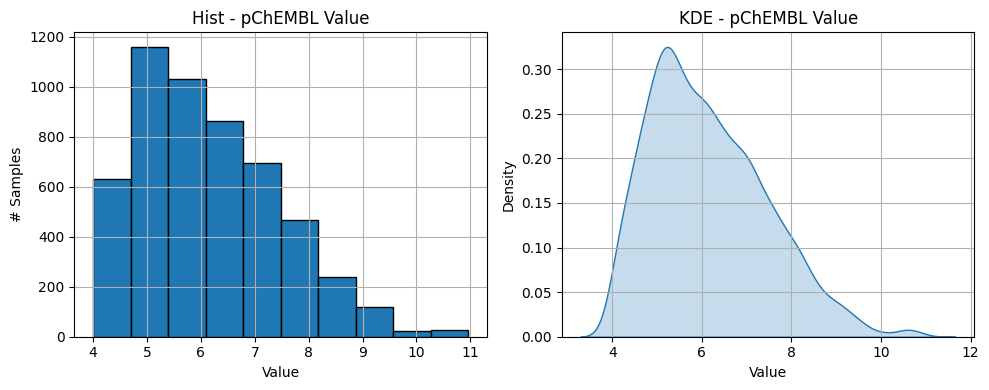

In [8]:
# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

# First plot
ax1.hist(y, bins = 10, edgecolor = 'black')
ax1.set_title('Hist - pChEMBL Value')
ax1.set_xlabel('Value')
ax1.set_ylabel('# Samples')
ax1.grid()

# Second plot
sns.kdeplot(y, ax = ax2, fill = True)
ax2.set_title('KDE - pChEMBL Value')
ax2.set_xlabel('Value')
ax2.set_ylabel('Density')
ax2.grid()

plt.tight_layout()
plt.show()

In [9]:
df_x_ = compounds_md.copy()
df_x_ = df_x_.drop('Activity', axis=1) # Este renglón puede ser útil #Opción 2
df_x_ = df_x_.drop('pChEMBL Value', axis=1)
df_x_ = df_x_.drop('Cluster_number', axis=1)
df_x_ = df_x_.select_dtypes("number")  # quitar non_numeric

In [10]:
df_x_.shape

(5254, 1197)

In [11]:
x = np.array(df_x_)
x.shape

(5254, 1197)

## Applying Mutual Information to Molecular Descriptors

In [12]:
x_array = np.array(df_x_[ [
'BCUTZ-1l',
 'Xp-4dv',
 'SpMAD_Dzpe',
 'SlogP_VSA10',
 'VR2_A',
 'VSA_EState7',
 'ATSC1i',
 'SssNH',
 'NssCH2',
 'Xpc-5dv',
 'SlogP_VSA8',
 'ATS1d',
 'VE1_A',
 'SssCH2',
 'Xp-7dv',
 'BCUTm-1h',
 'SpDiam_Dzv',
 'piPC6',
 'VSA_EState3',
 'ETA_eta_L',
 'VR1_A',
 'Xp-3dv',
 'nAromAtom',
 'PEOE_VSA2',
 'AMID'
] ])
x_array.shape

(5254, 25)

In [13]:
y_array = y
y_array.shape

(5254,)

## Standarize Features

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [15]:
x_std = scaler.fit_transform(x_array)
x_std.shape

(5254, 25)

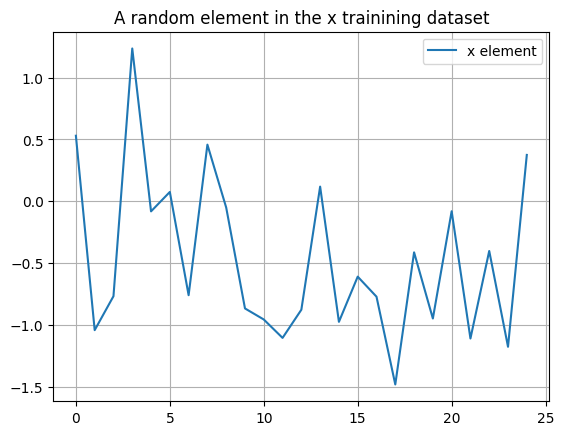

The corresponding y element -> 5.01


In [16]:
plot_xy([x_std, y_array])

## Splitting Train and Test

In [17]:
N_BINS=10 ##discretizer, this was 10 before
N_SPLITS=10 ##splitter
TEST_SIZE=2/5 ##splitter

In [18]:
# dividimos train test con stratified
discretizer = sklearn.preprocessing.KBinsDiscretizer(n_bins=N_BINS, encode="ordinal", strategy="uniform")
splitter = sklearn.model_selection.StratifiedShuffleSplit(n_splits=N_SPLITS,test_size=TEST_SIZE, random_state=13)
y_discrete = discretizer.fit_transform(np.expand_dims(y_array, axis = -1))
split, split_test = next(splitter.split(np.expand_dims(x_std, axis = -1), y_discrete ))

In [19]:
x_train = x_std[split]
x_test = x_std[split_test]
y_train = y_array[split]
y_test = y_array[split_test]

In [20]:
x_train.shape, x_test.shape

((3152, 25), (2102, 25))

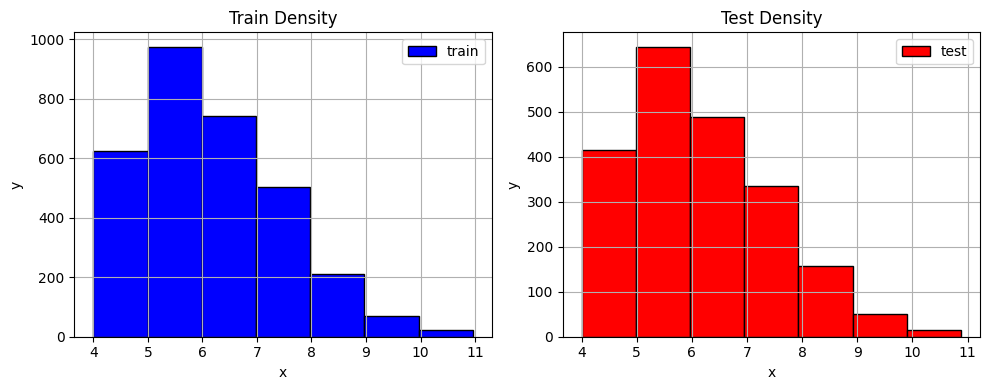

In [21]:
# Crear una figura con dos subplots en horizontal (1 fila, 2 columnas)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))  # figsize ajusta el tamaño

# Graficar la primera curva en el primer subplot
ax1.hist(y_train, color='blue', label='train', bins = 7, edgecolor = 'black')
ax1.set_title('Train Density')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.grid()
ax1.legend()

# Graficar la segunda curva en el segundo subplot
ax2.hist(y_test, color='red', label='test', bins = 7, edgecolor = 'black')
ax2.set_title('Test Density')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.grid()
ax2.legend()

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

## Paths

In [22]:
name = 'DNN_MI_25_FULL_Bondad_De_Ajuste'
if colab:
    folder_path = '/content/drive/MyDrive/Colaboracion_Quimica/Main_Codes/AutoEncoders/models'
else: 
    folder_path = '../models'
    
final_path = os.path.join(folder_path, name)

## Callbacks

**Observe in this section that EarlyStopping will take effect on the validation set. In this case, the train and validation set are equal.**

In [23]:
callbacks = standard_callbacks(folder_name= name,
                               folder_path= folder_path,
                               patiences= [200, 1000], # 50 epochs without progress, and 2 epochs to reduce LR
                               monitor = 'val_r2_score', # val_r2_score 
                               flow_direction = 'max')

## Seed

In [24]:
keras.utils.set_random_seed(1360)

## DNN Model

In [25]:
def _DNN():

  inputs = keras.layers.Input((25,))

  _DNN_ = G_Dense(
      inputs = inputs,
      nodes = [ 251, 301, 401, 51, 401 ],
      DP = 5,
      n_final = 1,
      act_func = 'leaky_relu',
      final_act_func = 'relu',
      WI = 'he_normal',
      L1 = 0.0,
      L2 = 0.0,
      use_bias = True
  )

  return keras.models.Model(inputs = inputs, outputs = _DNN_)

In [26]:
model_DNN= _DNN()

2025-08-21 17:21:31.856295: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-08-21 17:21:31.856364: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:134] retrieving CUDA diagnostic information for host: alan-amaro-Nvidia
2025-08-21 17:21:31.856377: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:141] hostname: alan-amaro-Nvidia
2025-08-21 17:21:31.856650: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:165] libcuda reported version is: 570.169.0
2025-08-21 17:21:31.856697: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:169] kernel reported version is: 570.169.0
2025-08-21 17:21:31.856708: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:248] kernel version seems to match DSO: 570.169.0


In [27]:
model_DNN.compile(optimizer = keras.optimizers.Adam(),
                    loss = 'mae',
                    metrics = ['mape', 'r2_score'])

In [28]:
get_plot_model(model_DNN, folder_path= final_path)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [29]:
model_DNN.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 251)            │         6,526 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 251)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 251)            │         1,004 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 301)            │        75,852 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 301)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 301)            │         1,204 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 401)            │       121,102 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 401)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 401)            │         1,604 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 51)             │        20,502 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 51)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 51)             │           204 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 401)            │        20,852 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 401)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 401)            │         1,604 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           402 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 250,856 (979.91 KB)

 Trainable params: 248,046 (968.93 KB)

 Non-trainable params: 2,810 (10.98 KB)

## Training

In [30]:
model_trained = model_training(model_DNN,
                               folder_path = final_path,
                               batch_size = 256,
                               num_epochs = 10000,
                               x_train = x_train,
                               y_train = y_train,
                               x_val = x_train,
                               y_val = y_train,
                               callbacks = callbacks)

Epoch 1/10000
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 152ms/step - loss: 4.9394 - mape: 78.5828 - r2_score: -15.9803 - val_loss: 3.8886 - val_mape: 60.3456 - val_r2_score: -11.7246 - learning_rate: 0.0010
Epoch 2/10000
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 3.3910 - mape: 51.9900 - r2_score: -9.9392 - val_loss: 3.9326 - val_mape: 61.0457 - val_r2_score: -11.8847 - learning_rate: 0.0010
Epoch 3/10000
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 2.6194 - mape: 39.4881 - r2_score: -6.9806 - val_loss: 3.5580 - val_mape: 54.8749 - val_r2_score: -10.6767 - learning_rate: 0.0010
Epoch 4/10000
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 2.1903 - mape: 32.6459 - r2_score: -5.4729 - val_loss: 3.1267 - val_mape: 48.1017 - val_r2_score: -9.3113 - learning_rate: 0.0010
Epoch 5/10000
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 1.9986 - mape: 30.0131 - r2_score: -4.7985 - val_loss: 2.5890 - val_mape: 39.6936 - val_r2_score: -7.3584 - learning_rate: 0.0010
Epoch 6/10000
13/13 ━━━━━━━━━━━━━━━

## Save Model

In [31]:
model_DNN.save( os.path.join(final_path, 'model.h5') )

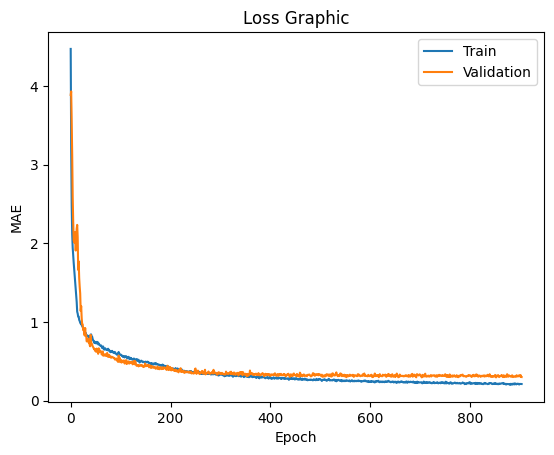

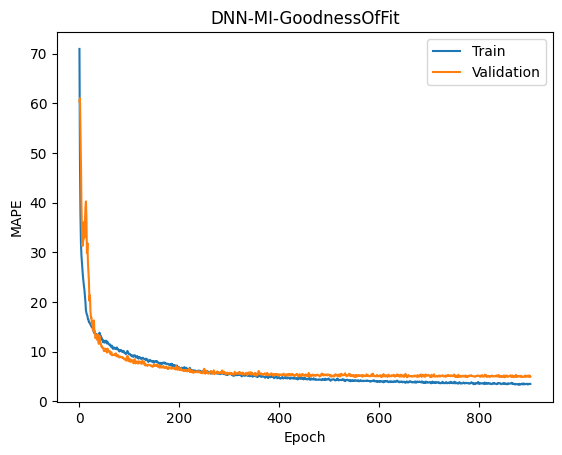

In [32]:
do_graphics(
    model_trained,
    'DNN-MI-GoodnessOfFit',
    ('MAE', 'MAPE'),
    final_path,
    metric = 'mape'
)

## Evaluate

**Bondad de Ajuste (Sin K-Fold)**

In [33]:
loss, accuracy, _ = evaluate_model_regression(model_DNN, x_train, y_train)

99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2930 - mape: 4.7720 - r2_score: 0.8888 
-> Loss = 0.29666924476623535
-> Test Accuracy = 4.837347030639648
-> R2 Accuracy = 0.8900797963142395


**In this case, this model presents a Goodness of fit: 0.890**

## KDE Comparison

In [34]:
import seaborn as sns

99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step   


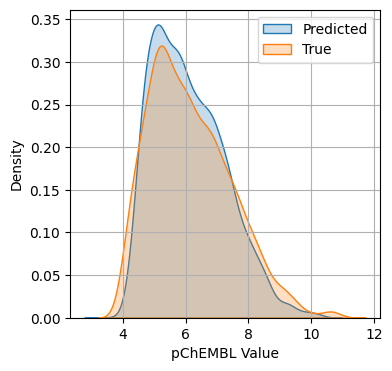

In [35]:
plt.figure(figsize = (4,4))
sns.kdeplot( model_DNN.predict(x_train), label = 'Predicted', fill= True)
sns.kdeplot(y_train, label = 'True', fill = True)
plt.grid()
plt.legend()
plt.show()

## Comparative Plot

99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step 


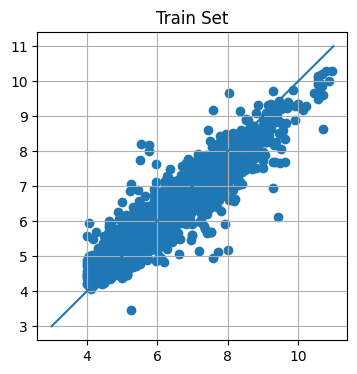

In [36]:
plt.figure(figsize = (4,4))
plt.plot([x for x in range(3, 12)], [x for x in range(3, 12)])
plt.scatter(y_train, model_DNN.predict(x_train))
#sns.kdeplot(y_test, label = 'True', fill = True)
plt.grid()
plt.title('Train Set')
plt.show()